In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
class KNN:
    def __init__(self,X,y,num_clusters = 3):
        self.X = X
        self.y = y
        self.k = num_clusters
    def get_k_nearest(self,dist):
        k_nearest = []
        for i in range(self.k):
            min_idx = np.argmin(dist)
            k_nearest.append(self.y[min_idx])
            dist[min_idx] = 1000000
        return k_nearest
    def majority(self,k_nearest):
        label_count = {}
        for label in k_nearest:
            if label in label_count:
                label_count[label]+=1
            else:
                label_count[label] = 1
        return max(label_count,key = label_count.get)
    def predict(self,X):
        return np.array([self._predict(x) for x in X])
    def _predict(self,x):
        dist = self.euclidian(self.X,x)
        k_nearest = self.get_k_nearest(dist)
        return self.majority(k_nearest)
    def euclidian(self,X,x):
        return np.sqrt(np.sum((X-x)**2,axis = 1))
    def Manhattan(self):
        pass
    def Minkowsky(self):
        pass
    def plot(self):  
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        scatter = ax.scatter(self.X[:, 0], self.y, self.X[:, 1], c=self.predict(self.X), cmap='coolwarm', s=50)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_zlabel('Z Coordinate')
        plt.colorbar(scatter, label='Cluster')
        plt.title('3D KNN Clustering Results')
        plt.show()

In [6]:
# Example dataset
X = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 8], [8, 7]])
y = np.array([0, 0, 0, 1, 1, 1])  # Binary classification labels

# Create KNN instance
knn = KNN(X, y, num_clusters=3)

print(knn.predict([[8,7]]))

[1]


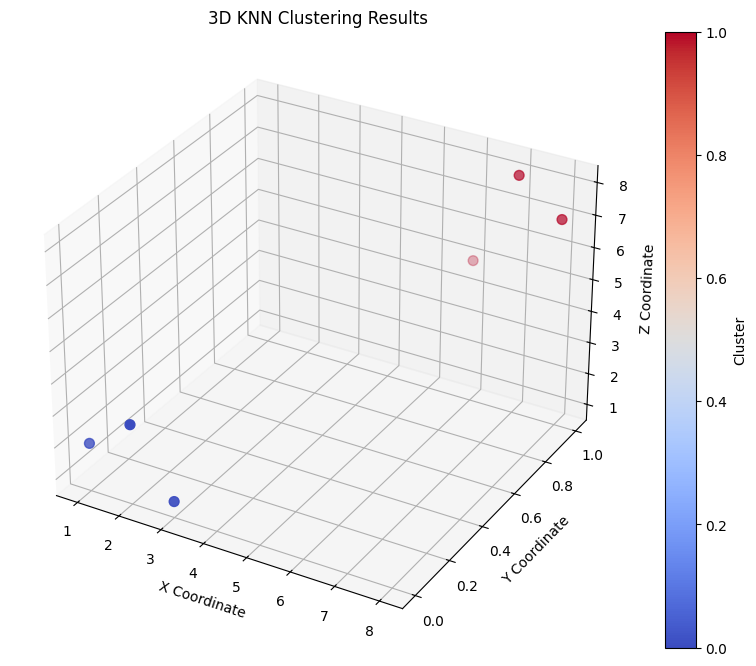

In [7]:
knn.plot()